3
Found 1446 images belonging to 2 classes.
Found 160 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

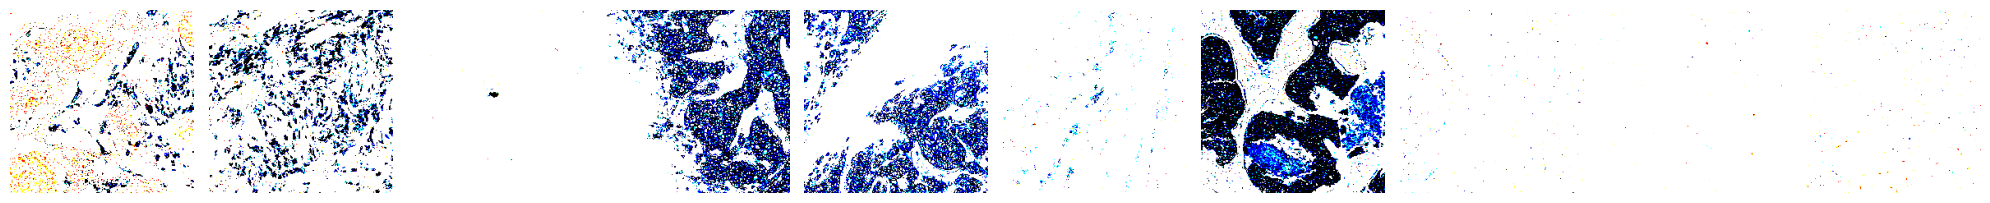

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

Batch data shape: (32, 224, 224, 3)
46/46 - 531s - loss: 0.5132 - accuracy: 0.8465 - val_loss: 0.1815 - val_accuracy: 0.9438 - 531s/epoch - 12s/step


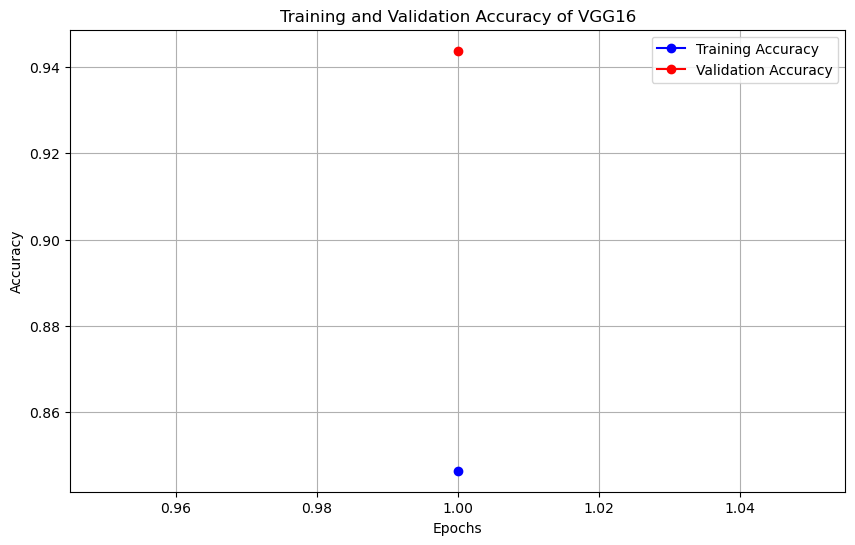

15/15 [==============================] - 27s 2s/step - loss: 0.2056 - accuracy: 0.9125
Testing Accuracy: 0.9125000238418579
15/15 - 28s - 28s/epoch - 2s/step
Confusion matrix, without normalization
[[ 94   1]
 [ 20 125]]
46/46 - 615s - loss: 0.1518 - accuracy: 0.9509 - val_loss: 0.1339 - val_accuracy: 0.9500 - 615s/epoch - 13s/step
INFO:tensorflow:Assets written to: /Users/varnarajnaguleswaran/Downloads/Her2 - 2classesv02/ResultsFT_HER2Sample_VGG16/assets


INFO:tensorflow:Assets written to: /Users/varnarajnaguleswaran/Downloads/Her2 - 2classesv02/ResultsFT_HER2Sample_VGG16/assets


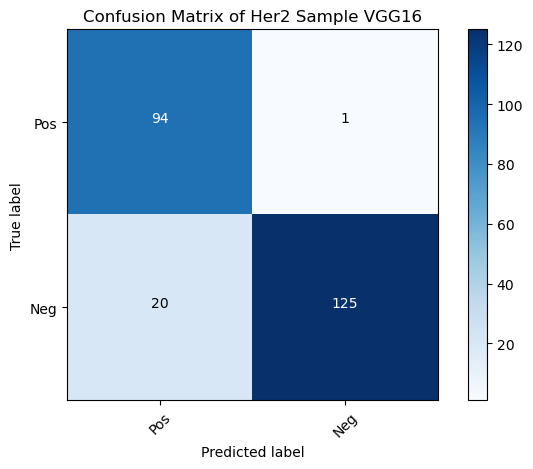

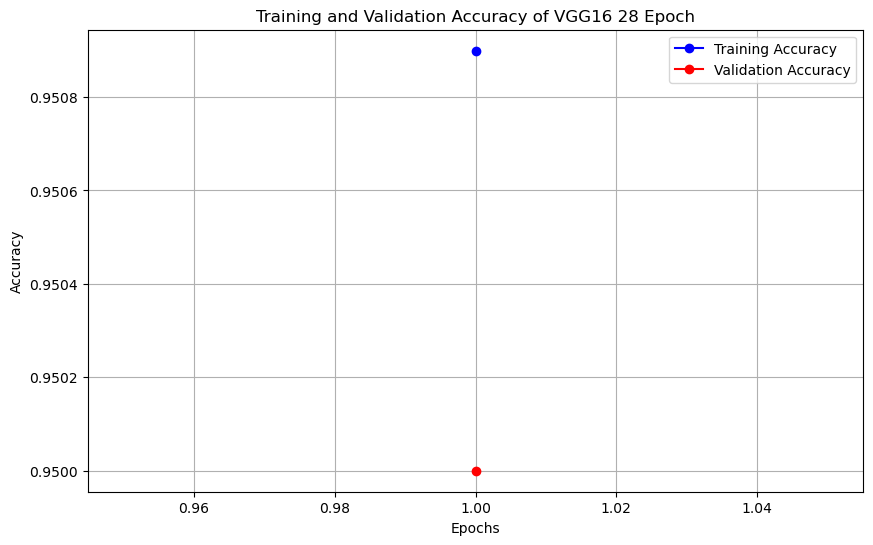

15/15 [==============================] - 37s 2s/step - loss: 0.1978 - accuracy: 0.9375
Testing Accuracy: 0.9375


You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


Model saved successfully at: /Users/varnarajnaguleswaran/Downloads/Her2 - 2classesv02/Results/FT_HER2Sample_VGG16.h5


In [2]:


# Commented out IPython magic to ensure Python compatibility.
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)
# %matplotlib inline
result_path="/Users/varnarajnaguleswaran/Downloads/Her2 - 2classesv02/Results"

base  = "/Users/varnarajnaguleswaran/Downloads/Her2 - 2classesv02"

train_path = os.path.join(base, 'Train')
# valid_path = os.path.join(base, 'valid')
test_path =  os.path.join(base, 'Test')
print(len(os.listdir(train_path)))

classes = ["Pos", "Neg"]

tf.random.set_seed(42)

dataGenerator = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input,validation_split=0.1)
train_batches = dataGenerator.flow_from_directory(directory=train_path, target_size=(224, 224), classes=classes, batch_size=32,class_mode='categorical',subset='training')
valid_batches = dataGenerator.flow_from_directory(directory= train_path, target_size = (224,224),classes = classes, batch_size = 16,class_mode='categorical',subset='validation')
test_batches =  ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = test_path, target_size=(224,224),classes =classes, batch_size = 16, shuffle = False,class_mode='categorical',subset='training')

def plotImages(images_arr):
  fig,axes = plt.subplots(1,10, figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

imgs, labels = next(train_batches)

plotImages(imgs)

def plot_confusion_matrix(cm, classes, normalize= False, title='Confusin Matrix', cmap = plt.cm.Blues):
  plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks,classes)

  if normalize:
    cm = cm.astype('flot')/ cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)
  thresh = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i,cm[i,j],
             horizontalalignment = "center",
             color="white" if cm[i,j]> thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

vgg16_model = tf.keras.applications.vgg16.VGG16()

model = Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)

for layer in model.layers:
  layer.trainable = True

model.summary()

# Add a dropout layer with a dropout rate of 0.5
model.add(Dropout(0.5))
model.add(Dense(units=256, activation = 'relu'))

model.add(Dense(units=2, activation = 'softmax'))

model.summary()

model.compile(optimizer = Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

batch_data = train_batches[0][0]  # Access the first batch of data
batch_shape = batch_data.shape
print("Batch data shape:", batch_shape)

train_batches.class_indices

history = model.fit(x= train_batches, validation_data = valid_batches, epochs = 1, verbose= 2)

# Extract training and validation accuracy
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create a range of epochs
epochs = range(1, 2)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of VGG16')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

test_loss, test_accuracy = model.evaluate(test_batches)

print("Testing Accuracy:", test_accuracy)

predictions =model.predict(x= test_batches, verbose=2)
cm = confusion_matrix(y_true= test_batches.classes, y_pred = np.argmax(predictions, axis=-1))
plot_confusion_matrix(cm=cm, classes=classes, title = 'Confusion Matrix of Her2 Sample VGG16')

history = model.fit(x= train_batches, validation_data = valid_batches, epochs = 1, verbose= 2)

model.save(result_path+"FT_HER2Sample_VGG16")

# Extract training and validation accuracy
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create a range of epochs
epochs = range(1, 2)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of VGG16 28 Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

test_loss, test_accuracy = model.evaluate(test_batches)

print("Testing Accuracy:", test_accuracy)

# model.save(result_path+"FT_HER2Sample_VGG16_28epochs")

# Specify the directory and file name for saving the model
model_save_path = os.path.join(result_path, "FT_HER2Sample_VGG16.h5")

# Save the model
model.save(model_save_path)

# Check if the model is saved
if os.path.exists(model_save_path):
    print("Model saved successfully at:", model_save_path)
else:
    print("Model was not saved.")


In [4]:
original_test_data_generator = ImageDataGenerator()
original_test_batches = original_test_data_generator.flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    classes=classes,
    batch_size=16,
    shuffle=False,
    class_mode='categorical',
    subset='training'
)


Found 240 images belonging to 2 classes.


1/1 [==============================] - 0s 260ms/step


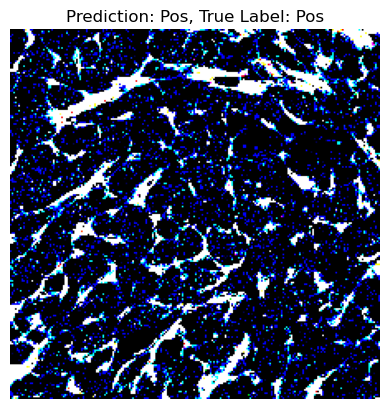

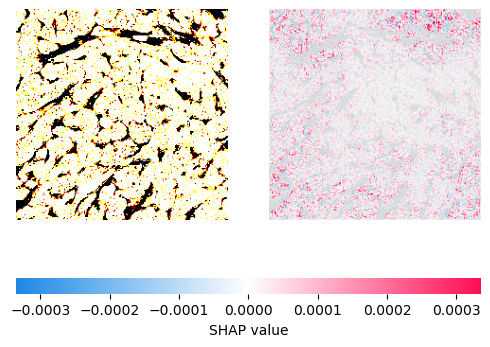

1/1 [==============================] - 0s 166ms/step


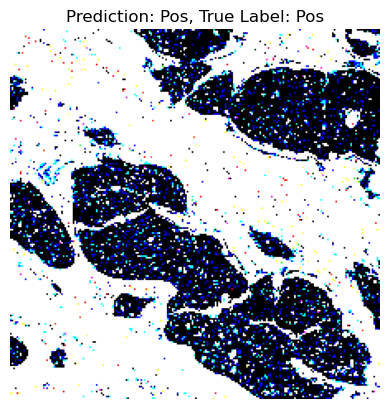

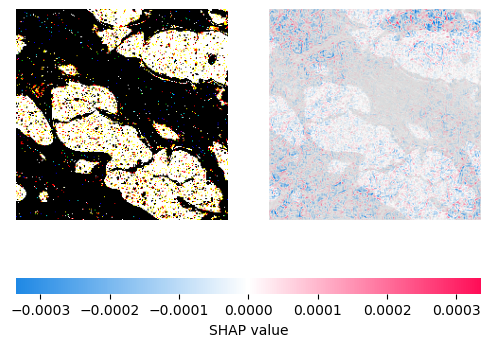

1/1 [==============================] - 0s 194ms/step


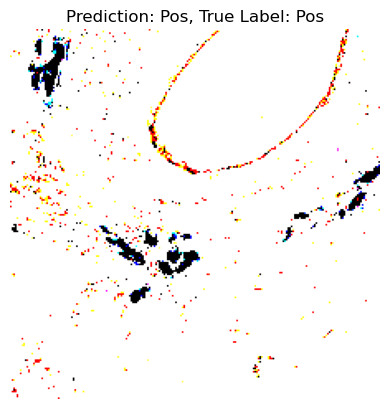

IndexError: list index out of range

In [7]:
# Import necessary libraries
import shap
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the saved model from the .h5 file
model_path = "/Users/varnarajnaguleswaran/Downloads/Her2 - 2classesv02/Results/FT_HER2Sample_VGG16.h5"  # Replace with the actual path to your saved model
model = tf.keras.models.load_model(model_path)

# Define class labels
classes = ["Pos", "Neg"]

# Create a DeepExplainer instance for your model
background = train_batches[0][0]  # Use the first batch of training data as background
e = shap.DeepExplainer(model, background)

# Get the test data and labels
test_images, test_labels = next(test_batches)

# Compute Shapley values for all images in the test set
shap_values = e.shap_values(test_images)

# Loop through each test image to display prediction, labels, and Shapley values
for i in range(len(test_images)):
    image = test_images[i]
    label = test_labels[i]
    prediction = model.predict(np.expand_dims(image, axis=0))
    
    # Display the image
    plt.imshow(image)
    plt.title(f"Prediction: {classes[np.argmax(prediction)]}, True Label: {classes[np.argmax(label)]}")
    plt.axis('off')
    plt.show()
    
    # Visualize the Shapley values for this image
    shap.image_plot(shap_values[i][0], -image)  # Assuming shap_values[i] is a list with one element


1/1 [==============================] - 0s 295ms/step


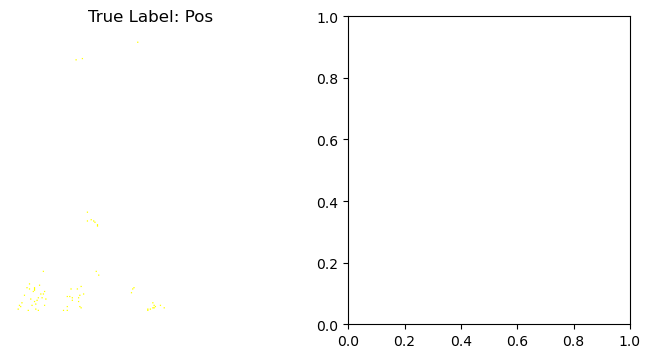

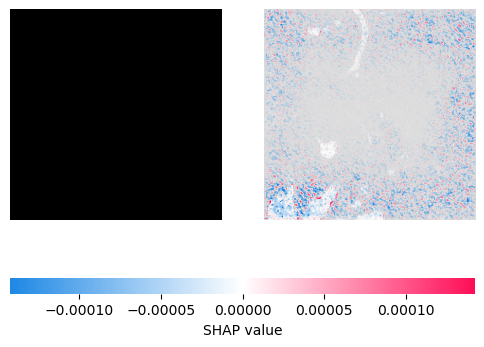

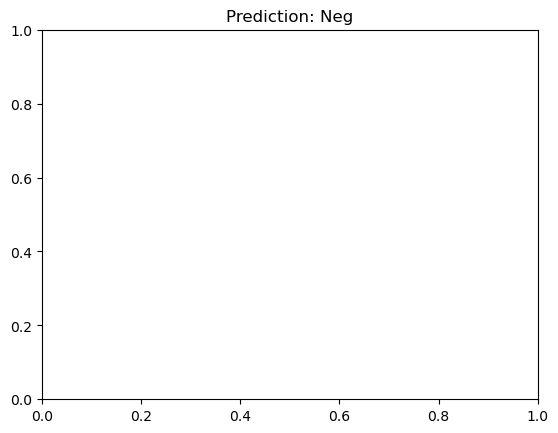

1/1 [==============================] - 0s 185ms/step


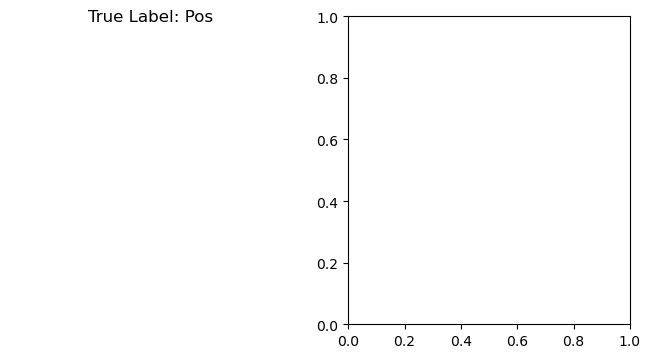

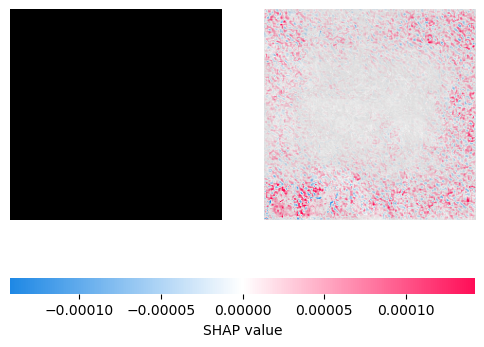

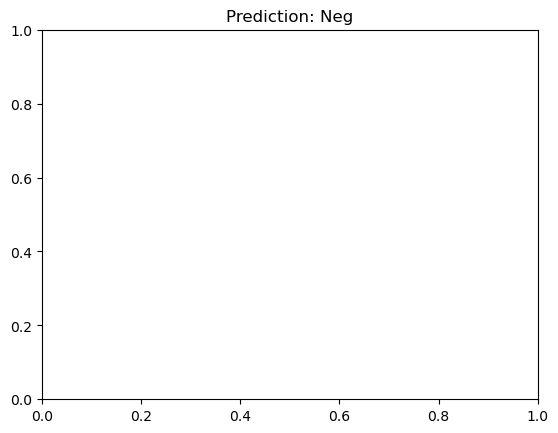

1/1 [==============================] - 0s 175ms/step


IndexError: list index out of range

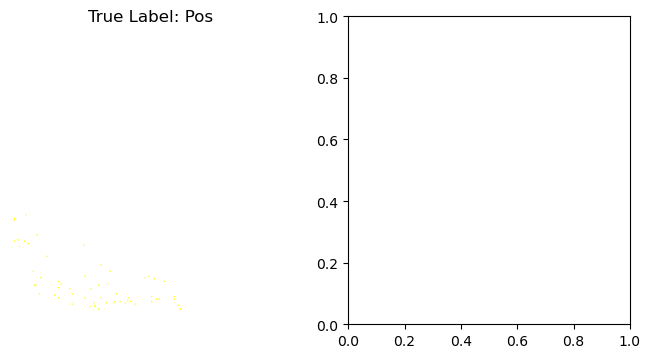

In [5]:
# Import necessary libraries
import shap
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the saved model from the .h5 file
model_path = "/Users/varnarajnaguleswaran/Downloads/Her2 - 2classesv02/Results/FT_HER2Sample_VGG16.h5"  # Replace with the actual path to your saved model
model = tf.keras.models.load_model(model_path)

# Define class labels
classes = ["Pos", "Neg"]

# Create a DeepExplainer instance for your model
background = train_batches[0][0]  # Use the first batch of training data as background
e = shap.DeepExplainer(model, background)

# Get the test data and labels
test_images, test_labels = next(original_test_batches)

# Compute Shapley values for all images in the test set
shap_values = e.shap_values(test_images)

# Loop through each test image to display prediction, labels, and Shapley values with the original image
for i in range(len(test_images)):
    image = test_images[i]
    label = test_labels[i]
    prediction = model.predict(np.expand_dims(image, axis=0))
    
    # Display the original image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f"True Label: {classes[np.argmax(label)]}")
    plt.axis('off')
    
    # Display the Shapley values for this image
    plt.subplot(1, 2, 2)
    shap.image_plot(shap_values[i][0], -image)  # Assuming shap_values[i] is a list with one element
    plt.title(f"Prediction: {classes[np.argmax(prediction)]}")
    
    plt.show()


In [ ]:
# Import necessary libraries
import shap
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the saved model from the .h5 file
model_path = "/Users/varnarajnaguleswaran/Downloads/Her2 - 2classesv02/Results/FT_HER2Sample_VGG16.h5"  # Replace with the actual path to your saved model
model = tf.keras.models.load_model(model_path)

# Define class labels
classes = ["Pos", "Neg"]

# Create a DeepExplainer instance for your model
background = train_batches[0][0]  # Use the first batch of training data as background
e = shap.DeepExplainer(model, background)

# Get the test data and labels
test_images, test_labels = next(original_test_batches)

# Compute Shapley values for all images in the test set
shap_values = e.shap_values(test_images)

# Loop through each test image to display prediction, labels, original image, and Shapley values
for i in range(len(test_images)):
    image = test_images[i]
    label = test_labels[i]
    prediction = model.predict(np.expand_dims(image, axis=0))
    
    # Display the original image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f"Original Image\nTrue Label: {classes[np.argmax(label)]}")
    plt.axis('off')
    
    # Display the Shapley values for this image
    plt.subplot(1, 2, 2)
    shap.image_plot(shap_values[i][0], -image)  # Assuming shap_values[i] is a list with one element
    plt.title(f"Shapley Values\nPrediction: {classes[np.argmax(prediction)]}")
    
    plt.show()


1/1 [==============================] - 0s 281ms/step


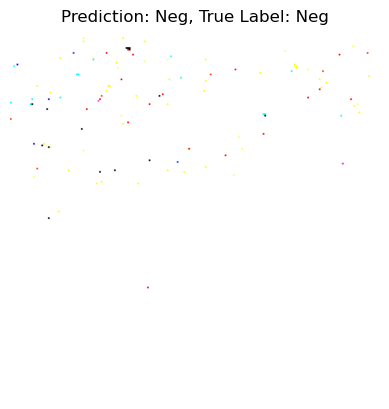

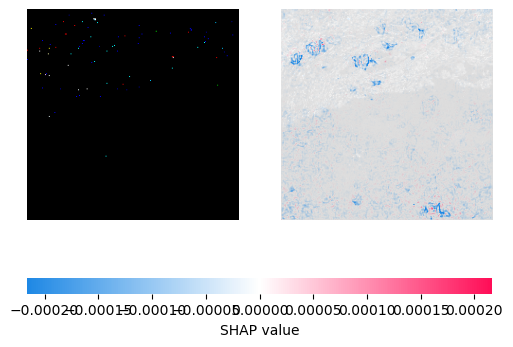

1/1 [==============================] - 0s 161ms/step


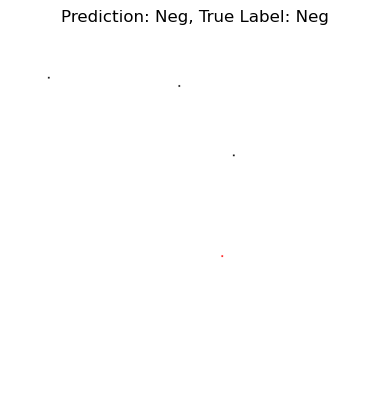

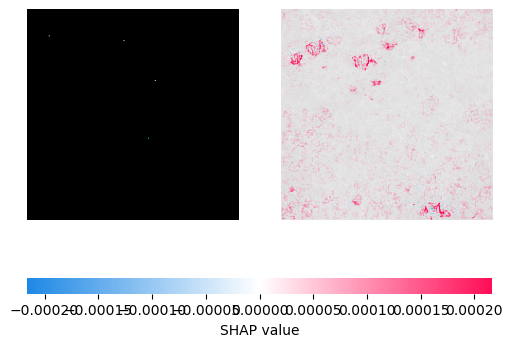

1/1 [==============================] - 0s 165ms/step


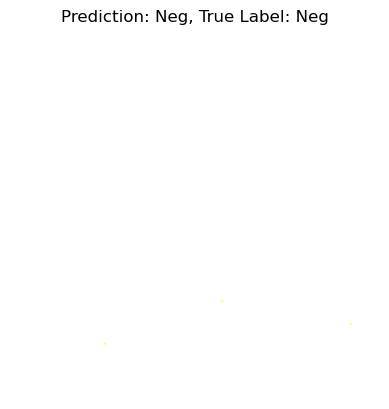

IndexError: list index out of range

In [13]:
# Import necessary libraries
import shap
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the saved model from the .h5 file
model_path = "/Users/varnarajnaguleswaran/Downloads/Her2 - 2classesv02/Results/FT_HER2Sample_VGG16.h5"  # Replace with the actual path to your saved model
model = tf.keras.models.load_model(model_path)

# Define class labels
classes = ["Pos", "Neg"]

# Create a DeepExplainer instance for your model
background = train_batches[1][0]  # Use the first batch of training data as background
e = shap.DeepExplainer(model, background)

# Get the test data and labels
test_images, test_labels = next(test_batches)

# Compute Shapley values for all images in the test set
shap_values = e.shap_values(test_images)

# Loop through each test image to display prediction, labels, and Shapley values
for i in range(len(test_images)):
    image = test_images[i]
    label = test_labels[i]
    prediction = model.predict(np.expand_dims(image, axis=0))
    
    # Display the image
    plt.imshow(image)
    plt.title(f"Prediction: {classes[np.argmax(prediction)]}, True Label: {classes[np.argmax(label)]}")
    plt.axis('off')
    plt.show()
    
    # Visualize the Shapley values for this image
    shap.image_plot(shap_values[i][0], -image)  # Assuming shap_values[i] is a list with one element


1/1 [==============================] - 0s 272ms/step


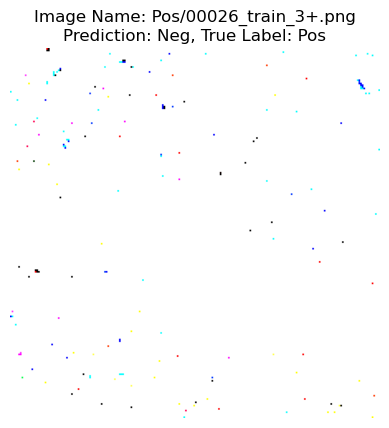

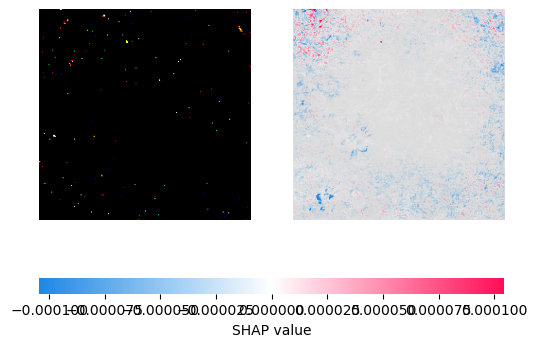

1/1 [==============================] - 0s 169ms/step


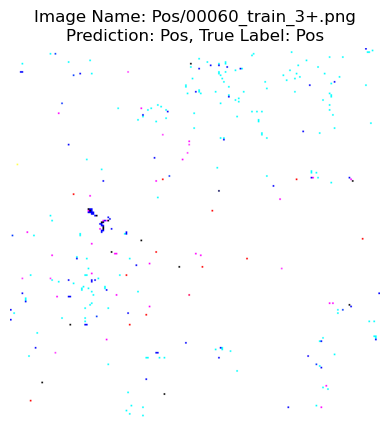

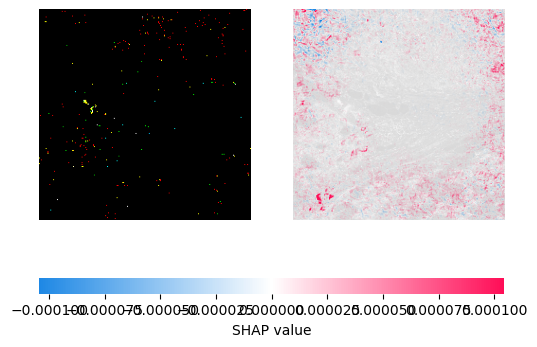

1/1 [==============================] - 0s 180ms/step


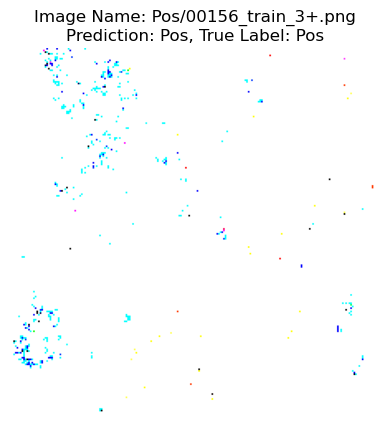

IndexError: list index out of range

In [6]:
# Import necessary libraries
import shap
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the saved model from the .h5 file
model_path = "/Users/varnarajnaguleswaran/Downloads/Her2 - 2classesv02/Results/FT_HER2Sample_VGG16.h5"  # Replace with the actual path to your saved model
model = tf.keras.models.load_model(model_path)

# Define class labels
classes = ["Pos", "Neg"]

# Create a DeepExplainer instance for your model
background = train_batches[1][0]  # Use the first batch of training data as background
e = shap.DeepExplainer(model, background)

# Get the test data and labels
test_images, test_labels = next(test_batches)

# Assuming you have a list of image file names corresponding to the test images
image_file_names = test_batches.filenames

# Compute Shapley values for all images in the test set
shap_values = e.shap_values(test_images)

# Loop through each test image to display prediction, labels, and Shapley values
for i in range(len(test_images)):
    image = test_images[i]
    label = test_labels[i]
    prediction = model.predict(np.expand_dims(image, axis=0))
    
    # Get the image file name for the current image
    image_name = image_file_names[i]
    
    # Display the image
    plt.imshow(image)
    plt.title(f"Image Name: {image_name}\nPrediction: {classes[np.argmax(prediction)]}, True Label: {classes[np.argmax(label)]}")
    plt.axis('off')
    plt.show()
    
    # Visualize the Shapley values for this image
    shap.image_plot(shap_values[i][0], -image)  # Assuming shap_values[i] is a list with one element


1/1 [==============================] - 0s 193ms/step


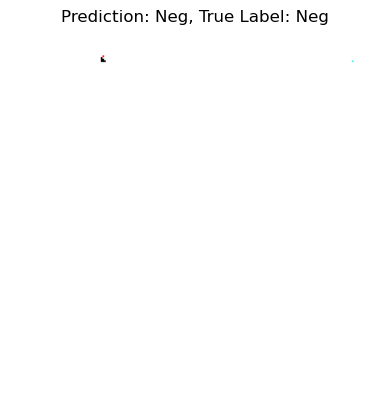

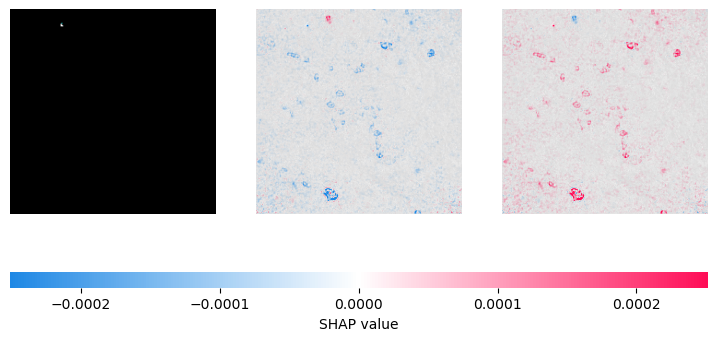

In [10]:
# Import necessary libraries
import shap
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the saved model from the .h5 file
model_path = "/Users/varnarajnaguleswaran/Downloads/Her2 - 2classesv02/Results/FT_HER2Sample_VGG16.h5"  # Replace with the actual path to your saved model
model = tf.keras.models.load_model(model_path)

# Define class labels
classes = ["Pos", "Neg"]

# Create a DeepExplainer instance for your model
background = train_batches[0][0]  # Use the first batch of training data as background
e = shap.DeepExplainer(model, background)

# Get the test data and labels
test_images, test_labels = next(test_batches)

# Find an index of a negative image in the test dataset
negative_image_index = np.argmax(test_labels[:, 1] == 1)  # Assuming the second class represents 'Neg'

# Compute Shapley values for the selected negative image
shap_values = e.shap_values(test_images[[negative_image_index]])  # Wrap the index in double square brackets to create a batch

# Display the selected negative image
negative_image = test_images[negative_image_index]
negative_label = test_labels[negative_image_index]
negative_prediction = model.predict(np.expand_dims(negative_image, axis=0))

plt.imshow(negative_image)
plt.title(f"Prediction: {classes[np.argmax(negative_prediction)]}, True Label: {classes[np.argmax(negative_label)]}")
plt.axis('off')
plt.show()

# Visualize the Shapley values for the selected negative image
shap.image_plot(shap_values, -test_images[[negative_image_index]])


In [15]:
# ... (your existing code above)
#newone
# Import Shapley library
import shap

# Create a DeepExplainer instance for your model
background = train_batches[0][0]  # Use the first batch of training data as background
e = shap.DeepExplainer(model, background)

# Compute Shapley values for a specific image (e.g., the first image in the test set)
shap_values = e.shap_values(test_batches[0][0])

# Visualize the Shapley values for this image
shap.image_plot(shap_values, -test_batches[0][0])



KeyboardInterrupt: 

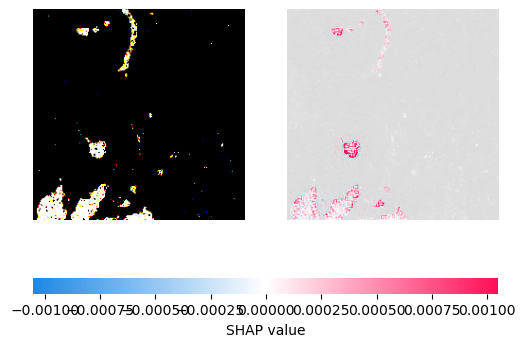

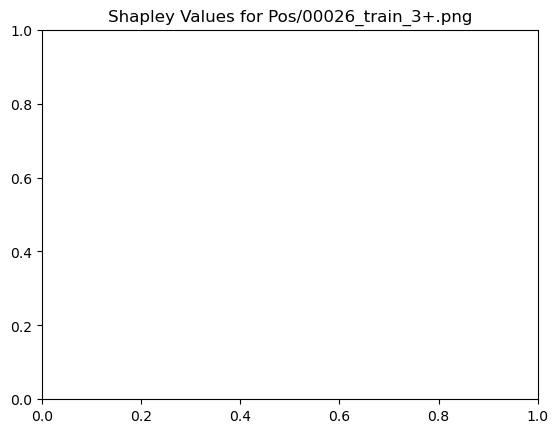

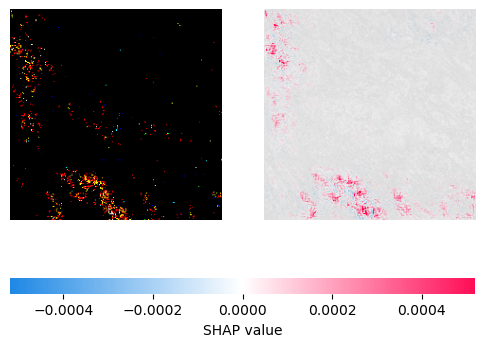

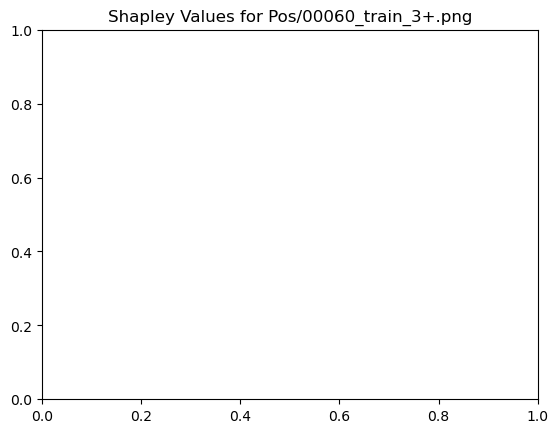

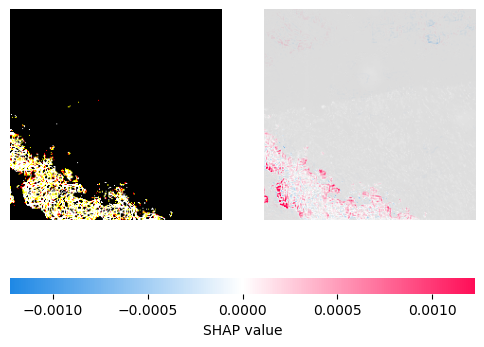

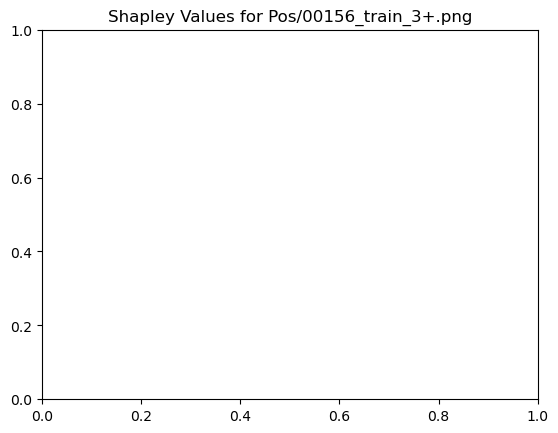

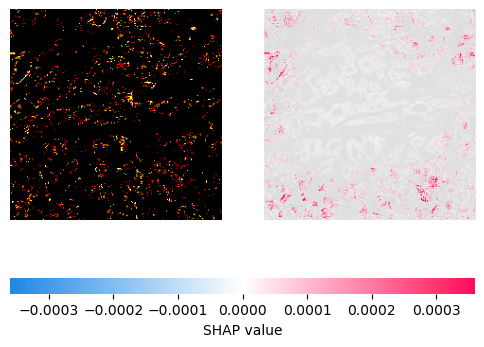

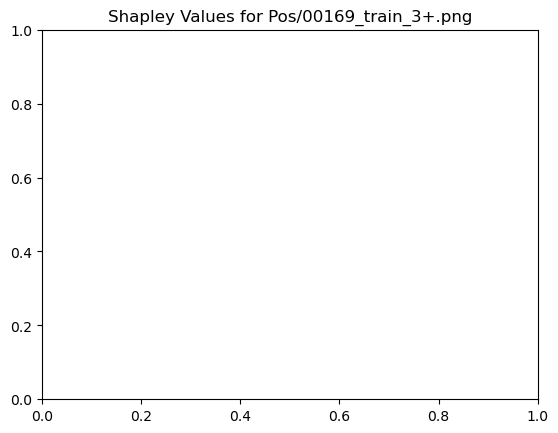

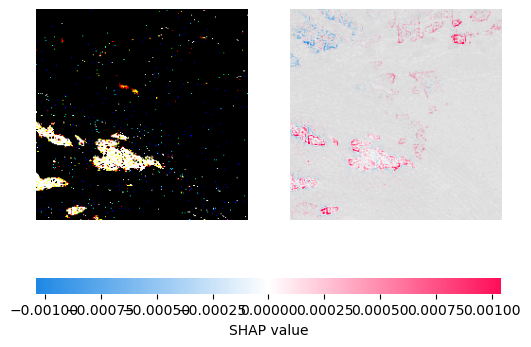

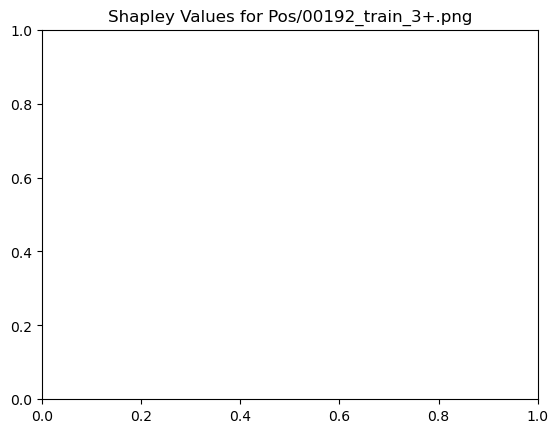

In [16]:
# Import Shapley library
import shap

# Create a DeepExplainer instance for your model
background = train_batches[0][0]  # Use the first batch of training data as background
e = shap.DeepExplainer(model, background)

# Get the first 5 images and their Shapley values
num_images_to_visualize = 5
shap_values = e.shap_values(test_batches[0][0][:num_images_to_visualize])

# Get the image filenames for the first 5 images
image_filenames = test_batches.filenames[:num_images_to_visualize]

# Iterate through each image and its corresponding Shapley values
for i in range(num_images_to_visualize):
    image_name = image_filenames[i]
    shap_value = shap_values[0][i]  # Assuming it's a single-class model

    # Visualize the Shapley values for this image with its name
    shap.image_plot(shap_value, -test_batches[0][0][i])  # Use shap_value as input data
    plt.title(f"Shapley Values for {image_name}")
    plt.show()


Image Name: Pos/00026_train_3+.png


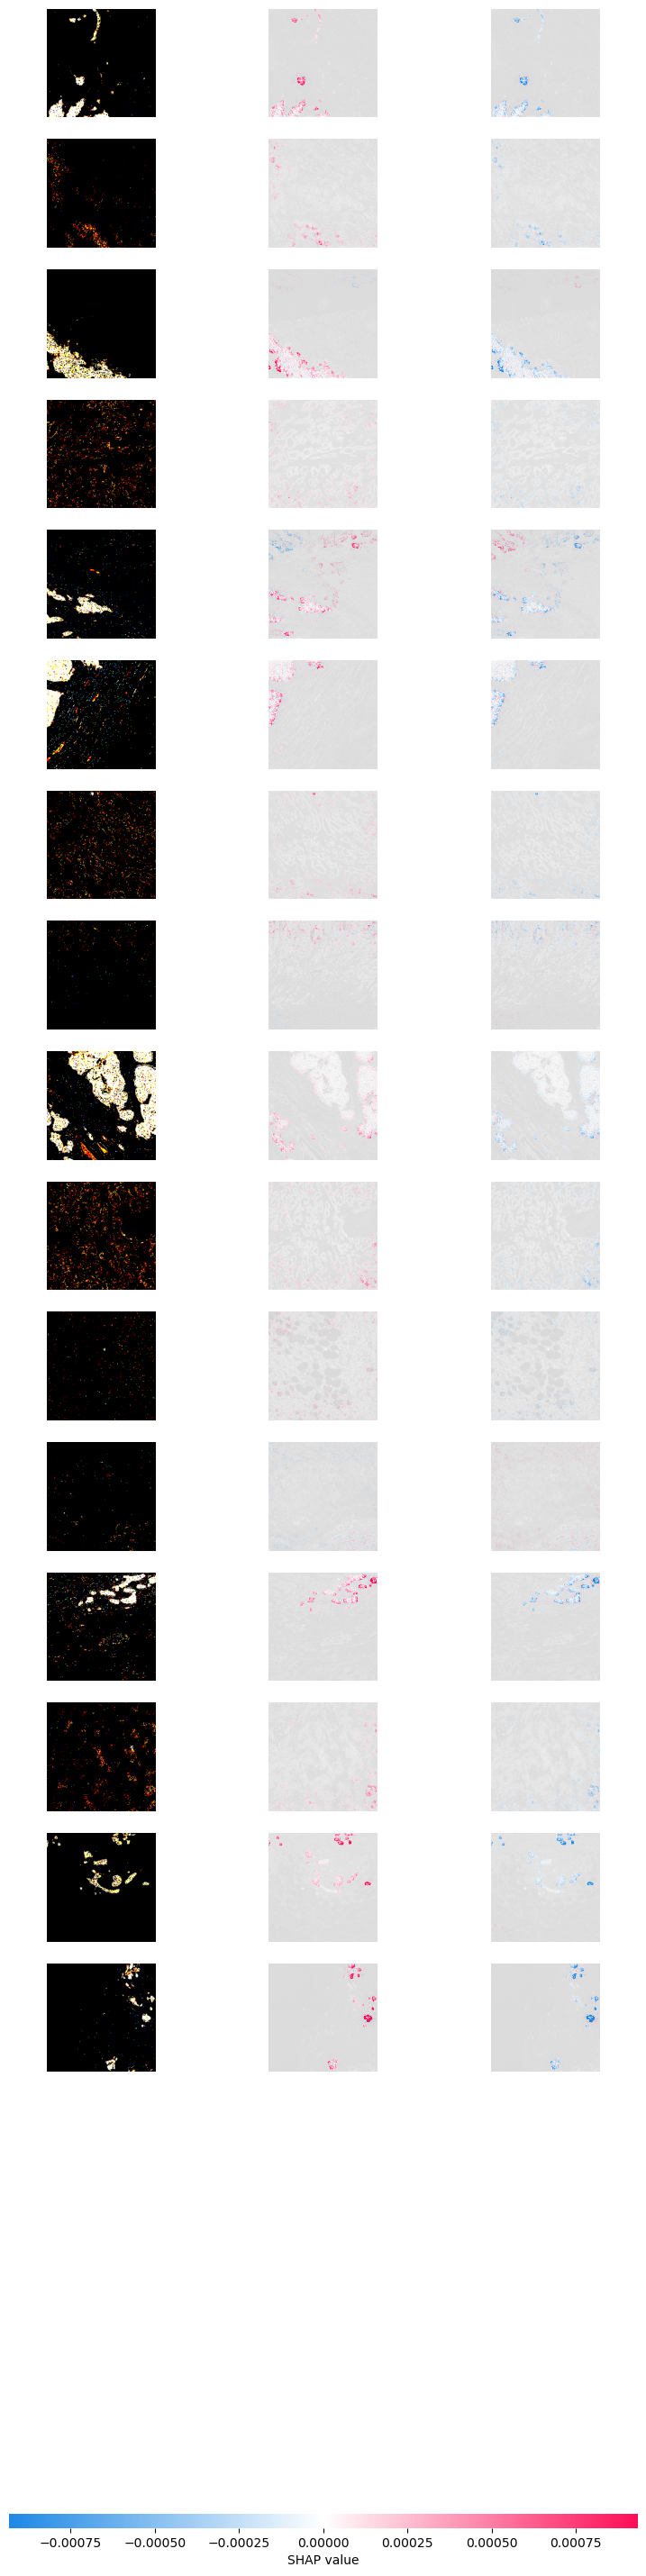

In [10]:
# Import Shapley library
import shap

# Create a DeepExplainer instance for your model
background = train_batches[0][0]  # Use the first batch of training data as background
e = shap.DeepExplainer(model, background)

# Select a specific image from the test set (e.g., the first image)
specific_image = test_batches[0][0]

# Get the image file name for the specific image
specific_image_name = test_batches.filenames[0]  # Assuming you have filenames for the test set

# Compute Shapley values for the specific image
shap_values = e.shap_values(specific_image)

# Display the image name
print(f"Image Name: {specific_image_name}")

# Visualize the Shapley values for this image
shap.image_plot(shap_values, -specific_image)


keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


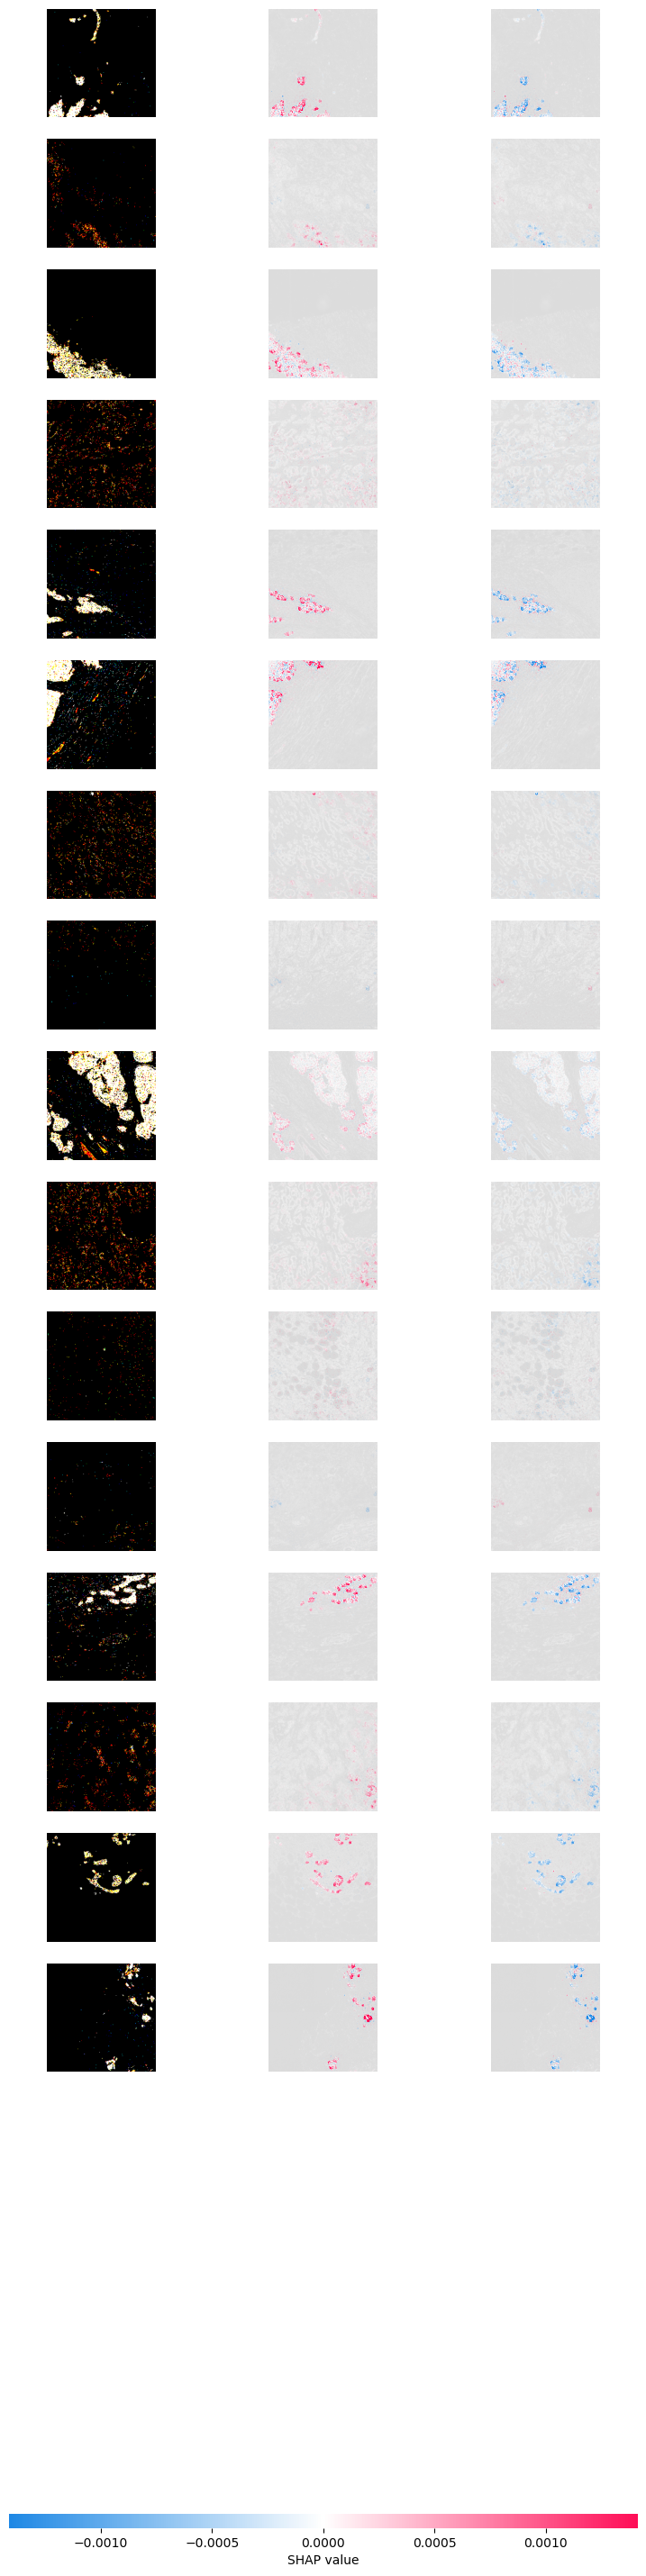

In [2]:
# ... (your existing code above)

# Import Shapley library
import shap

# Create a DeepExplainer instance for your model
background = train_batches[0][0]  # Use the first batch of training data as background
e = shap.DeepExplainer(model, background)

# Compute Shapley values for a specific image (e.g., the first image in the test set)
shap_values = e.shap_values(test_batches[0][0])

# Visualize the Shapley values for this image
shap.image_plot(shap_values, -test_batches[0][0])



1/1 [==============================] - 0s 194ms/step


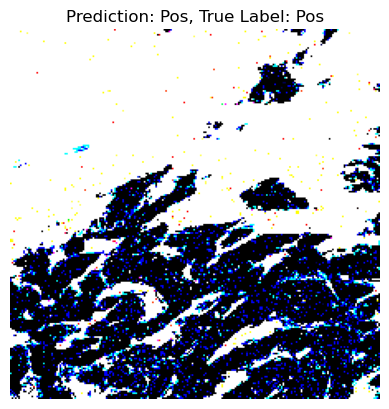

IndexError: index 16 is out of bounds for axis 0 with size 16

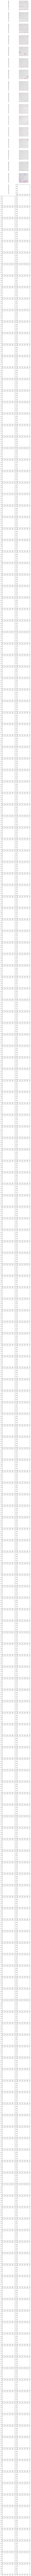

In [11]:
# Import Shapley library
#new
import shap
import numpy as np

# Create a DeepExplainer instance for your model
background = train_batches[0][0]  # Use the first batch of training data as background
e = shap.DeepExplainer(model, background)

# Get the test data and labels
test_images, test_labels = next(test_batches)

# Compute Shapley values for all images in the test set
shap_values = e.shap_values(test_images)

# Loop through each test image to display prediction, labels, and Shapley values
for i in range(len(test_images)):
    image = test_images[i]
    label = test_labels[i]
    prediction = model.predict(np.expand_dims(image, axis=0))
    
    # Display the image
    plt.imshow(image)
    plt.title(f"Prediction: {classes[np.argmax(prediction)]}, True Label: {classes[np.argmax(label)]}")
    plt.axis('off')
    plt.show()
    
    # Visualize the Shapley values for this image
    shap.image_plot(shap_values[i], -image)


In [ ]:
# Import Shapley library
import shap

# Create a DeepExplainer instance for your model
background = train_batches[0][0]  # Use the first batch of training data as background
e = shap.DeepExplainer(model, background)

# Loop through images in the test set
for i in range(len(test_batches)):
    image_batch = test_batches[i][0]
    
    # Compute Shapley values for this batch of images
    shap_values = e.shap_values(image_batch)

    # Compute predictions for this batch of images
    predictions = model.predict(image_batch)
    
    # Loop through individual images in the batch
    for j in range(len(image_batch)):
        print(f"Image {i * len(image_batch) + j + 1}:")
        print("Predictions:", predictions[j])
        print("Shapley Values:", shap_values[0][j])  # Shapley values for the j-th image in the batch


1/1 [==============================] - 2s 2s/step
Image 1:
Predictions: [9.9998987e-01 1.0123018e-05]
Shapley Values: [[[-5.52189931e-07  1.98450707e-07 -3.50793925e-07]
  [ 6.50752838e-07  1.92344100e-06  7.42057125e-07]
  [-1.03852892e-06  1.05572303e-06 -3.93511556e-07]
  ...
  [-7.13462889e-09  2.57108042e-07 -9.21171193e-07]
  [ 1.20497276e-07  2.89201836e-07 -1.00363422e-06]
  [ 3.31123466e-08  1.26230077e-07 -5.30549528e-07]]

 [[-2.85382157e-07  9.54773782e-07  7.06836971e-08]
  [ 2.20757715e-06  4.24390737e-06  1.97907093e-06]
  [-8.66319454e-07  1.17900026e-06 -4.22448920e-07]
  ...
  [ 1.74327766e-07  3.86205954e-07 -1.22217148e-06]
  [ 3.84671807e-07  3.82669782e-07 -1.41024964e-06]
  [ 2.28583303e-07  3.12523014e-07 -4.02272633e-07]]

 [[-7.78953620e-07  6.01360853e-07 -3.09209099e-07]
  [ 1.49505911e-06  2.88949855e-06  1.22436154e-06]
  [-1.91702748e-06 -5.54120788e-07 -2.34108506e-06]
  ...
  [ 8.49073558e-07  3.25528191e-07 -8.07805122e-07]
  [ 5.55586951e-07  4.377295

1/1 [==============================] - 3s 3s/step
Image 17:
Predictions: [0.00314865 0.9968514 ]
Shapley Values: [[[ 5.02177159e-07  9.20587581e-07 -2.61872998e-07]
  [ 1.39605231e-06  1.44587443e-06  2.27160754e-07]
  [ 1.94542145e-06  5.44964450e-07 -1.63837228e-06]
  ...
  [ 1.90280457e-06 -6.75626643e-06  1.12523355e-06]
  [-1.98489170e-06 -5.27874272e-06  1.19000742e-06]
  [-1.45988690e-06 -3.01045498e-06 -1.71977021e-07]]

 [[-1.76603820e-07  1.40946188e-09  8.76370621e-08]
  [ 1.29647390e-06  1.52540292e-06  1.08390061e-07]
  [ 1.87148169e-06  3.94959642e-07 -1.97849135e-06]
  ...
  [ 1.26968234e-05 -8.32898240e-06  6.53044799e-06]
  [ 1.67958785e-06 -4.43656245e-06  5.34861374e-06]
  [-7.07021197e-09 -4.54897054e-06  9.80332857e-07]]

 [[-6.32334149e-07 -7.88441639e-07 -3.31937173e-07]
  [-4.89317131e-07 -1.24099381e-06 -2.37391234e-07]
  [ 2.68544727e-06  2.39969467e-07 -4.12674399e-06]
  ...
  [ 1.50654905e-05 -1.10071751e-05  5.38161930e-06]
  [ 2.94634629e-06 -8.11115206e-0

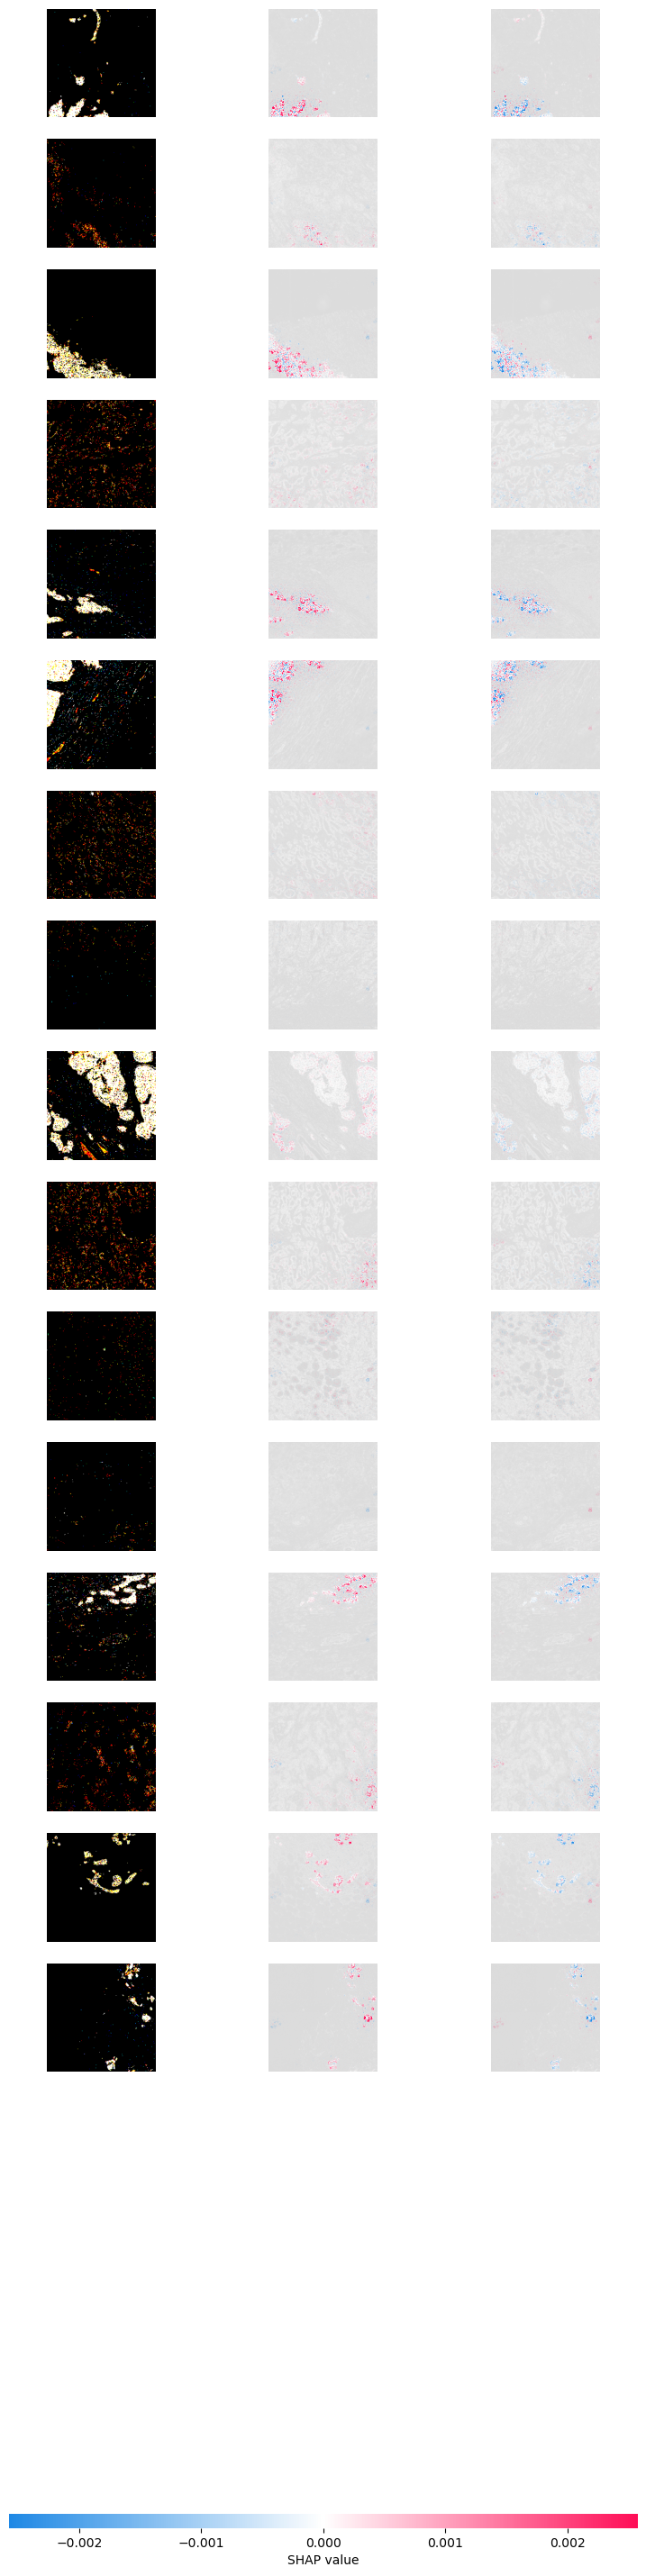

In [3]:
#gradiant explainer
# Import Shapley library
import shap

# Create a GradientExplainer instance for your model
explainer = shap.GradientExplainer(model, background)

# Compute Shapley values for a specific image (e.g., the first image in the test set)
shap_values = explainer.shap_values(test_batches[0][0])

# Visualize the Shapley values for this image
shap.image_plot(shap_values, -test_batches[0][0])

In [4]:
# Import Shapley library
import shap

# Create a KernelExplainer instance for your model
explainer = shap.KernelExplainer(model.predict, train_batches[0][0])

# Compute Shapley values for a specific image (e.g., the first image in the test set)
shap_values = explainer.shap_values(test_batches[0][0])

# Visualize the Shapley values for this image
shap.image_plot(shap_values, -test_batches[0][0])


1/1 [==============================] - 5s 5s/step


AssertionError: Instance must have 1 or 2 dimensions!

In [3]:
# Import Shapley library
import shap

# Create a TreeExplainer instance for your tree-based model
explainer = shap.TreeExplainer(model)

# Compute Shapley values for a specific instance (e.g., a row from your dataset)
shap_values = explainer.shap_values(test_data.iloc[0])

# Visualize the Shapley values
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, test_data.iloc[0])


InvalidModelError: Model type not yet supported by TreeExplainer: <class 'keras.src.engine.sequential.Sequential'>

In [4]:
# Import Shapley library
import shap

# Create a LinearExplainer instance for your linear model
explainer = shap.LinearExplainer(model, train_batches[0][0])

# Compute Shapley values for a specific instance (e.g., the first image in the test set)
shap_values = explainer.shap_values(test_batches[0][0])

# Visualize the Shapley values for this image
shap.image_plot(shap_values, -test_batches[0][0])


InvalidModelError: An unknown model type was passed: <class 'keras.src.engine.sequential.Sequential'>

In [6]:
import os
from sklearn.model_selection import train_test_split

base = "/Users/varnarajnaguleswaran/Downloads/Her2 - 2classesv02"
train_path = os.path.join(base, 'Train')
test_path = os.path.join(base, 'Test')

# List of classes
classes = ["Pos", "Neg"]

# Initialize lists to store image paths and corresponding labels
x_data = []
y_data = []

# Load image paths and labels
for class_name in classes:
    class_path = os.path.join(train_path, class_name)
    image_files = os.listdir(class_path)
    for image_file in image_files:
        image_path = os.path.join(class_path, image_file)
        x_data.append(image_path)
        y_data.append(class_name)

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Now you have x_train (list of training image paths), x_test (list of testing image paths),
# y_train (list of corresponding training labels), and y_test (list of corresponding testing labels).
print("Size of x_train:", len(x_train))
print("Size of x_test:", len(x_test))
print("Size of y_train:", len(y_train))
print("Size of y_test:", len(y_test))


Size of x_train: 1284
Size of x_test: 322
Size of y_train: 1284
Size of y_test: 322


Found 1446 images belonging to 2 classes.
Found 160 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


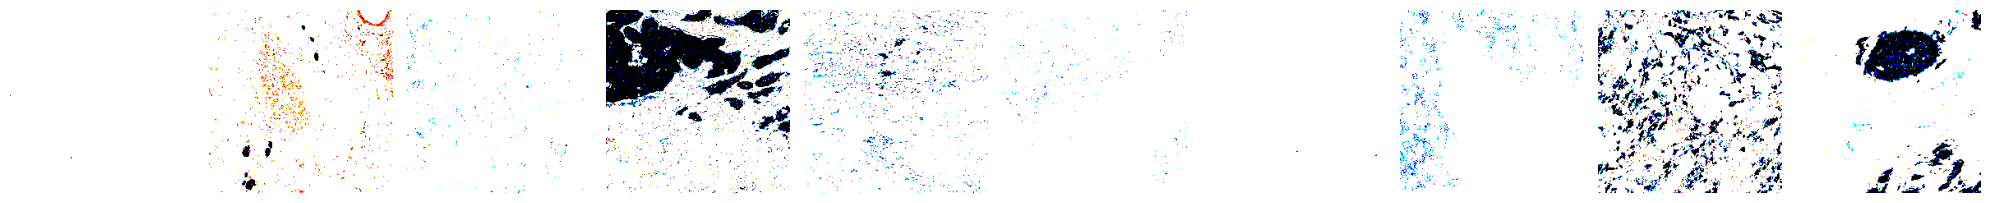

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

Batch data shape: (32, 224, 224, 3)
46/46 - 532s - loss: 0.3581 - accuracy: 0.8935 - val_loss: 0.1114 - val_accuracy: 0.9500 - 532s/epoch - 12s/step


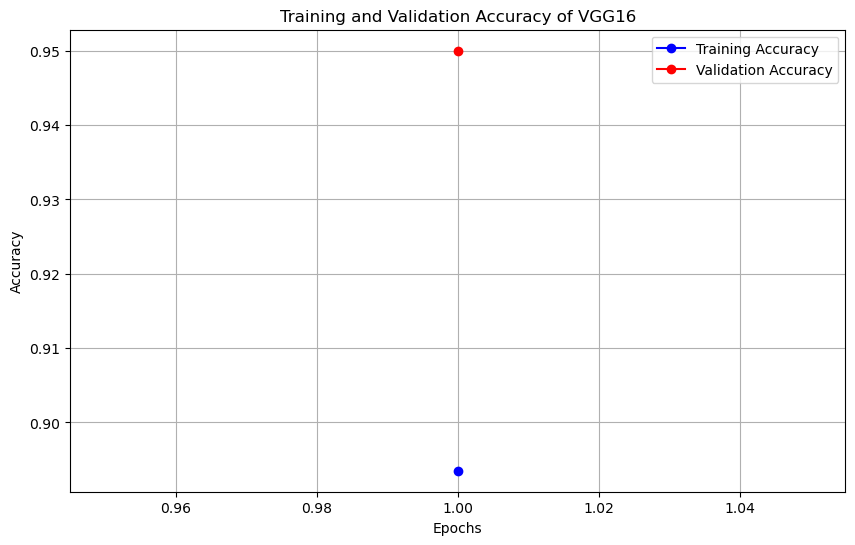

15/15 [==============================] - 28s 2s/step - loss: 0.2114 - accuracy: 0.9250
Testing Accuracy: 0.925000011920929
15/15 - 28s - 28s/epoch - 2s/step
Confusion matrix, without normalization
[[ 80  15]
 [  3 142]]


AttributeError: 'list' object has no attribute 'shape'

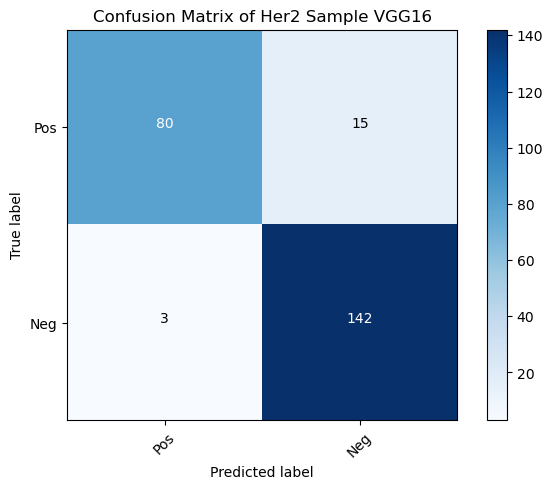

In [7]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import itertools
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import SHAP
import shap

# Set result path and base directory
result_path = "/Users/varnarajnaguleswaran/Downloads/Her2 - 2classesv02/Results"
base = "/Users/varnarajnaguleswaran/Downloads/Her2 - 2classesv02"

# Set train and test paths
train_path = os.path.join(base, 'Train')
test_path = os.path.join(base, 'Test')

# Define classes
classes = ["Pos", "Neg"]

# Seed for reproducibility
tf.random.set_seed(42)

# Data generators
dataGenerator = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input, validation_split=0.1)
train_batches = dataGenerator.flow_from_directory(directory=train_path, target_size=(224, 224), classes=classes, batch_size=32, class_mode='categorical', subset='training')
valid_batches = dataGenerator.flow_from_directory(directory=train_path, target_size=(224, 224), classes=classes, batch_size=16, class_mode='categorical', subset='validation')
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224, 224), classes=classes, batch_size=16, shuffle=False, class_mode='categorical', subset='training')

# Function to plot images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Get a batch of images for visualization
imgs, labels = next(train_batches)
plotImages(imgs)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Load VGG16 model
vgg16_model = tf.keras.applications.vgg16.VGG16()

model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

for layer in model.layers:
    layer.trainable = True

model.summary()

# Add a dropout layer with a dropout rate of 0.5
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='relu'))

model.add(Dense(units=2, activation='softmax'))

model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Access the first batch of data
batch_data = train_batches[0][0]
batch_shape = batch_data.shape
print("Batch data shape:", batch_shape)

# Class indices for training batches
train_batches.class_indices

# Fit the model
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=1, verbose=2)

# Extract training and validation accuracy
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create a range of epochs
epochs = range(1, 2)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of VGG16')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_batches)
print("Testing Accuracy:", test_accuracy)

# Predictions
predictions = model.predict(x=test_batches, verbose=2)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
plot_confusion_matrix(cm=cm, classes=classes, title='Confusion Matrix of Her2 Sample VGG16')

# Load SHAP DeepExplainer with the model and background data
background = x_train[np.random.choice(x_train.shape[0], 5000, replace=False)]
explainer = shap.DeepExplainer(model, background)

# Choose a specific example to explain
sample_idx = 0

# Compute SHAP values for the chosen example
shap_values = explainer.shap_values(x_test[sample_idx])

# Plot SHAP explanations for the chosen example
shap.image_plot(shap_values, -x_test[sample_idx])

# ... (The rest of your code)


In [14]:
!pip install lime


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 928ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 943ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


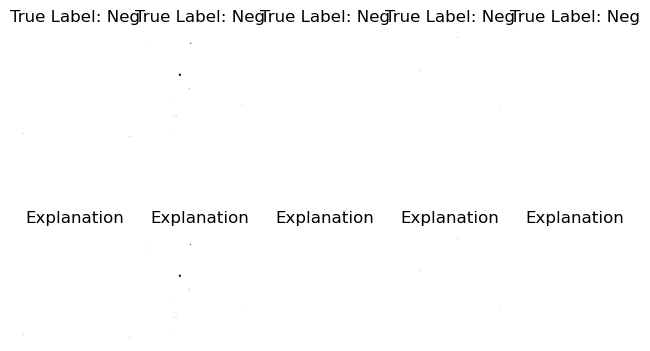

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from lime.lime_image import LimeImageExplainer
import tensorflow as tf

# Load your saved model
model_path = "/Users/varnarajnaguleswaran/Downloads/Her2 - 2classesv02/Results/FT_HER2Sample_VGG16.h5"  # Replace with the actual path to your saved model
model = tf.keras.models.load_model(model_path)

# Get the test data and labels
test_images, test_labels = next(test_batches)

# Define class labels
classes = ["Pos", "Neg"]

# Define a function to predict using your model
def predict_function(images):
    predictions = model.predict(images)
    return predictions

# Create a LimeImageExplainer instance
explainer = LimeImageExplainer()

# Select 5 sample images
sample_images = test_images[:5]

# Loop through the sample images and explain predictions
for i, image in enumerate(sample_images):
    explanation = explainer.explain_instance(image, predict_function, top_labels=1, num_samples=1000)
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
    
    # Display the original image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.title(f"True Label: {classes[np.argmax(test_labels[i])]}")
    plt.axis('off')
    
    # Display the explanation
    plt.subplot(2, 5, i + 6)
    plt.imshow(temp, cmap='gray')
    plt.title("Explanation")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [19]:
!pip install scikit-image


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


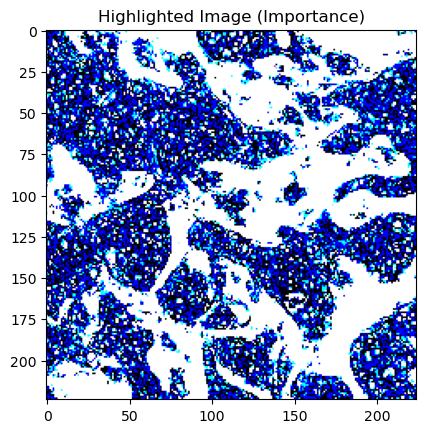

In [24]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from lime.lime_image import LimeImageExplainer
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from skimage.segmentation import mark_boundaries

# Load the saved VGG16 model
model_path = "/Users/varnarajnaguleswaran/Downloads/Her2 - 2classesv02/Results/FT_HER2Sample_VGG16.h5"
loaded_model = load_model(model_path)

# Define the classes
classes = ["Pos", "Neg"]

# Function to preprocess the image for prediction
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.vgg16.preprocess_input(img)
    return img

# Load the image you want to explain
image_path = "/Users/varnarajnaguleswaran/Downloads/Her2 - 2classesv02/Train/Pos/03967_train_3+.png"
original_img = preprocess_image(image_path)

# Create a LIME explainer
explainer = LimeImageExplainer()

# Explain the prediction for the image with specified num_features
explanation = explainer.explain_instance(original_img[0], loaded_model.predict, top_labels=1, num_features=100)

# Get the LIME explanation area without the original image
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, hide_rest=False)
lime_explanation = mark_boundaries(temp / 2 + 0.5, mask, outline_color=(1, 1, 0), mode='thick')

# Subtract the LIME explanation from the original image to highlight the areas of importance
highlighted_img = original_img - lime_explanation

# Display the highlighted image
plt.imshow(np.squeeze(highlighted_img))
plt.title("Highlighted Image (Importance)")

plt.show()
